In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as skl

# 0. Znalezienie danych
Dane są z przykładowego linku podanego w oryginalnym notebooku

# 1. Ładowanie danych
Użyje funkcji `read_csv` z biblioteki pandas

In [3]:
data = pd.read_csv('train.csv', index_col=0)

In [4]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#  2. Wstępne opisanie danych i brakujące wartości

In [33]:
data

,SalePrice,LotArea,YearBuilt,OverallQual
Id,,,,
1,208500,8450,2003,7
2,181500,9600,1976,6
3,223500,11250,2001,7
4,140000,9550,1915,7
5,250000,14260,2000,8
6,143000,14115,1993,5
7,307000,10084,2004,8
8,200000,10382,1973,7
9,129900,6120,1931,7


In [8]:
data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

Jak widzimy, wiele danych jest ustawionych jako `NaN`, zwłaszcza w kolumnach `Alley`, czy `PoolQC`

In [12]:
data.describe(include='all')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,5,NaN,NaN,2,2,4,4,2,5,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


Aby rozpocząć dalszą analizę, należy wybrać podzbiór danych, ja wybrałem `SalePrice`, `LotArea`, `YearBuilt` oraz `OverallQual`.

In [14]:
data = data[['SalePrice', 'LotArea', 'YearBuilt', 'OverallQual']]
data.describe(include='all')

,SalePrice,LotArea,YearBuilt,OverallQual
count,1460.000000,1460.000000,1460.000000,1460.000000
mean,180921.195890,10516.828082,1971.267808,6.099315
std,79442.502883,9981.264932,30.202904,1.382997
min,34900.000000,1300.000000,1872.000000,1.000000
25%,129975.000000,7553.500000,1954.000000,5.000000
50%,163000.000000,9478.500000,1973.000000,6.000000
75%,214000.000000,11601.500000,2000.000000,7.000000
max,755000.000000,215245.000000,2010.000000,10.000000


# 3. Rysowanie wykresów

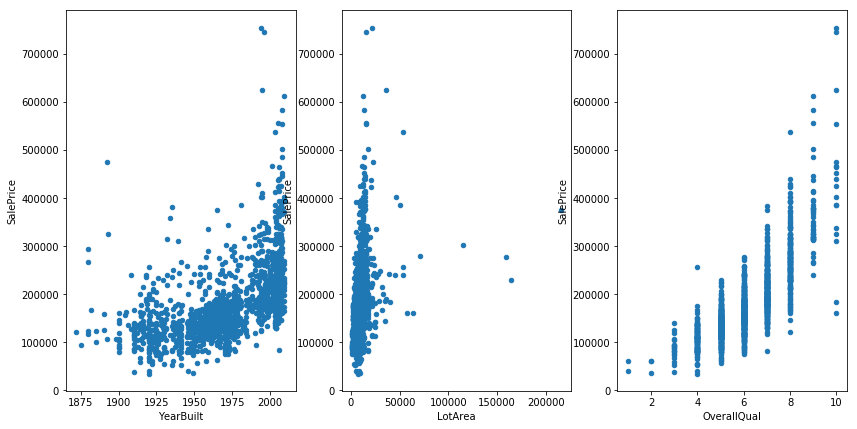

In [19]:
fig, ax = plt.subplots(1, 3)
data.plot(kind='scatter', x='YearBuilt', y='SalePrice', ax=ax[0], figsize = (14, 7))
data.plot(kind='scatter', x='LotArea', y='SalePrice', ax=ax[1])
data.plot(kind='scatter', x='OverallQual', y='SalePrice', ax=ax[2])

Teraz należy wyselekcjonować dane i odrzucić outlierów

In [30]:
data = data[(data.LotArea < 30000) & (data.YearBuilt > 1910) & (data.OverallQual >=3) & (data.OverallQual <= 9)]

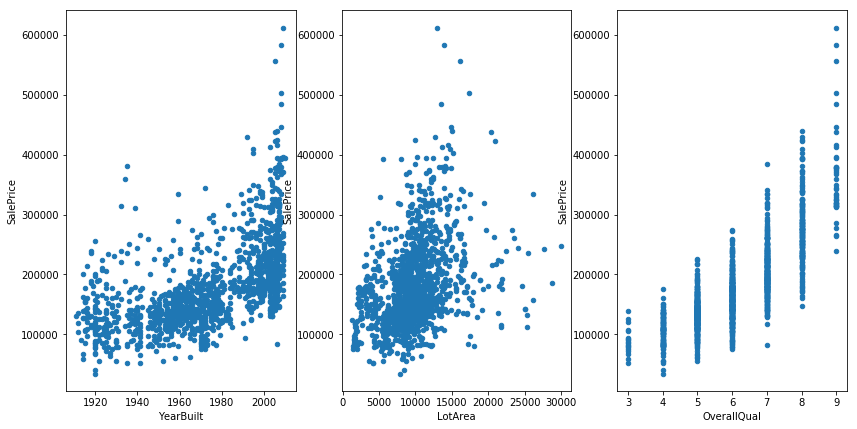

In [31]:
fig, ax = plt.subplots(1, 3)
data.plot(kind='scatter', x='YearBuilt', y='SalePrice', ax=ax[0], figsize = (14, 7))
data.plot(kind='scatter', x='LotArea', y='SalePrice', ax=ax[1])
data.plot(kind='scatter', x='OverallQual', y='SalePrice', ax=ax[2])

In [32]:
data.describe(include='all')

,SalePrice,LotArea,YearBuilt,OverallQual
count,1374.000000,1374.000000,1374.000000,1374.000000
mean,178636.361718,9626.139738,1973.518195,6.091703
std,71186.402646,3894.526882,27.602039,1.291590
min,34900.000000,1300.000000,1911.000000,3.000000
25%,130500.000000,7500.000000,1955.000000,5.000000
50%,163945.000000,9375.000000,1975.000000,6.000000
75%,212675.000000,11424.500000,2001.000000,7.000000
max,611657.000000,29959.000000,2010.000000,9.000000


Następnie wybierzemy dane do nauczania modeli i do testowania ich. Będziemy starali się oszacować cenę nieruchomości na podstawie roku budowy, wielkości oraz oceny jakościowej.

In [34]:
params = ['LotArea', 'YearBuilt', 'OverallQual']
price = ['SalePrice']

### Trening

In [35]:
x = data[params][:100]
y = data[price][:100]

### Test

In [36]:
x_test = data[params][:-100]
y_test = data[price][:-100]

# 5. Trenowanie modeli

### Regresja liniowa

In [45]:
reg_lin = skl.linear_model.LinearRegression()
reg_lin.fit(x, y)
pred = reg_lin.predict(x_test)
reg_lin.coef_

array([[3.97911811e+00, 6.15616412e+02, 2.72982504e+04]])

In [46]:
skl.metrics.mean_squared_error(y_test, pred)

1596833380.3159459

### Lasso

In [48]:
lasso = skl.linear_model.Lasso(alpha=1)
lasso.fit(x, y)
pred = lasso.predict(x_test)
lasso.coef_

array([3.97917401e+00, 6.15636548e+02, 2.72975005e+04])

In [49]:
skl.metrics.mean_squared_error(y_test, pred)

1596846667.3280005

### Ridge

In [50]:
ridge = skl.linear_model.Ridge(alpha=1)
ridge.fit(x, y)
pred = ridge.predict(x_test)
ridge.coef_

array([[3.99388603e+00, 6.21600471e+02, 2.70892569e+04]])

In [51]:
skl.metrics.mean_squared_error(y_test, pred)

1600578235.956733

### Elastic

In [54]:
elastic = skl.linear_model.ElasticNet(alpha=0.001, l1_ratio=1)
elastic.fit(x, y)
pred = elastic.predict(x_test)
elastic.coef_

array([3.97911816e+00, 6.15616432e+02, 2.72982496e+04])

In [55]:
skl.metrics.mean_squared_error(y_test, pred)

1596833393.6024332

## Wnioski
Najlepszą metodą wydaje się być Elastic Net, natomiast w przypadku wszystkich metod, średni błąd kwadratowy jest bardzo zbliżony